#### Import the packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Breast cancer Wisconsin - Diagnosis

Dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)).

   ##  Attribute                     Domain

1. Sample code number            id number
2. Clump Thickness               1 - 10
3. Uniformity of Cell Size       1 - 10
4. Uniformity of Cell Shape      1 - 10
5. Marginal Adhesion             1 - 10
6. Single Epithelial Cell Size   1 - 10
7. Bare Nuclei                   1 - 10
8. Bland Chromatin               1 - 10
9. Normal Nucleoli               1 - 10
10. Mitoses                       1 - 10
11. Class:                        (2 for benign, 4 for malignant)

## Class distribution:
 
   Benign: 458 (65.5%)
   Malignant: 241 (34.5%)
   
   Missing values are represented by "?"

#### Download and pre-processing

In [2]:
# Downloading the dataset

missing_values = ["?"]

dataset = pd.read_csv('/home/jean/Downloads/breast-cancer-wisconsin.data',na_values = missing_values,header=None)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [3]:
# Renaming columns according to the attribute domain

dataset.columns=['id','Clump_Thickness','Uniformity_of_Cell_Size','Uniformity_of_Cell_Shape','Marginal_Adhesion','Single_Epithelial_Cell_Size','Bare_Nuclei','Bland_Chromatin','Normal_Nucleoli','Mitoses','Class']

In [4]:
# Getting rid of id code number because non relevant

dataset = dataset.drop(['id'],axis=1)

In [5]:
dataset.head()

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2


In [6]:
# Number of unique value for each column to check the data

dataset.nunique()

Clump_Thickness                10
Uniformity_of_Cell_Size        10
Uniformity_of_Cell_Shape       10
Marginal_Adhesion              10
Single_Epithelial_Cell_Size    10
Bare_Nuclei                    10
Bland_Chromatin                10
Normal_Nucleoli                10
Mitoses                         9
Class                           2
dtype: int64

In [7]:
# Checking missing value

dataset.isnull().sum()

Clump_Thickness                 0
Uniformity_of_Cell_Size         0
Uniformity_of_Cell_Shape        0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    16
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [8]:
# Dropping missing value 

dataset=dataset.dropna()
dataset.isnull().sum()

Clump_Thickness                0
Uniformity_of_Cell_Size        0
Uniformity_of_Cell_Shape       0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [9]:
#Complete describtion of the dataset

dataset.describe()

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


Benign:  444
Malignant :  239


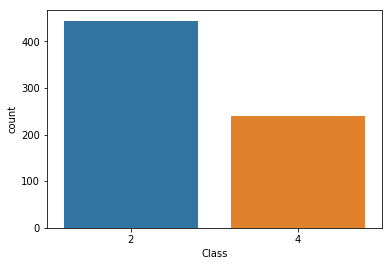

In [10]:
# Checking labels

Y = dataset.Class

X = dataset.drop(['Class'],axis=1)

B,M=Y.value_counts()
ax = sns.countplot(Y,label="Count")   
print('Benign: ',B)
print('Malignant : ',M)

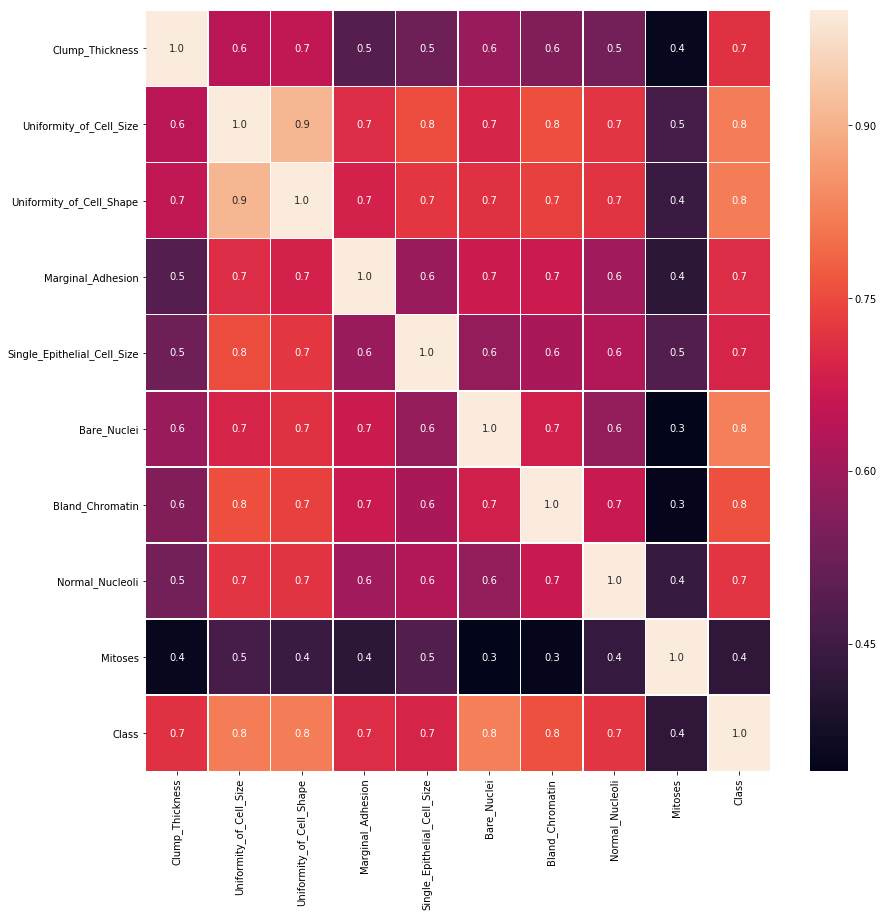

In [11]:
# Plotting the heatmap to see correlation intensity between variables

f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(dataset.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

#### As we can see, there is an important correlation (>0.7) between some variables, especially with the one we want to determine, so now let's observe this correlation with class labels and class repartition.


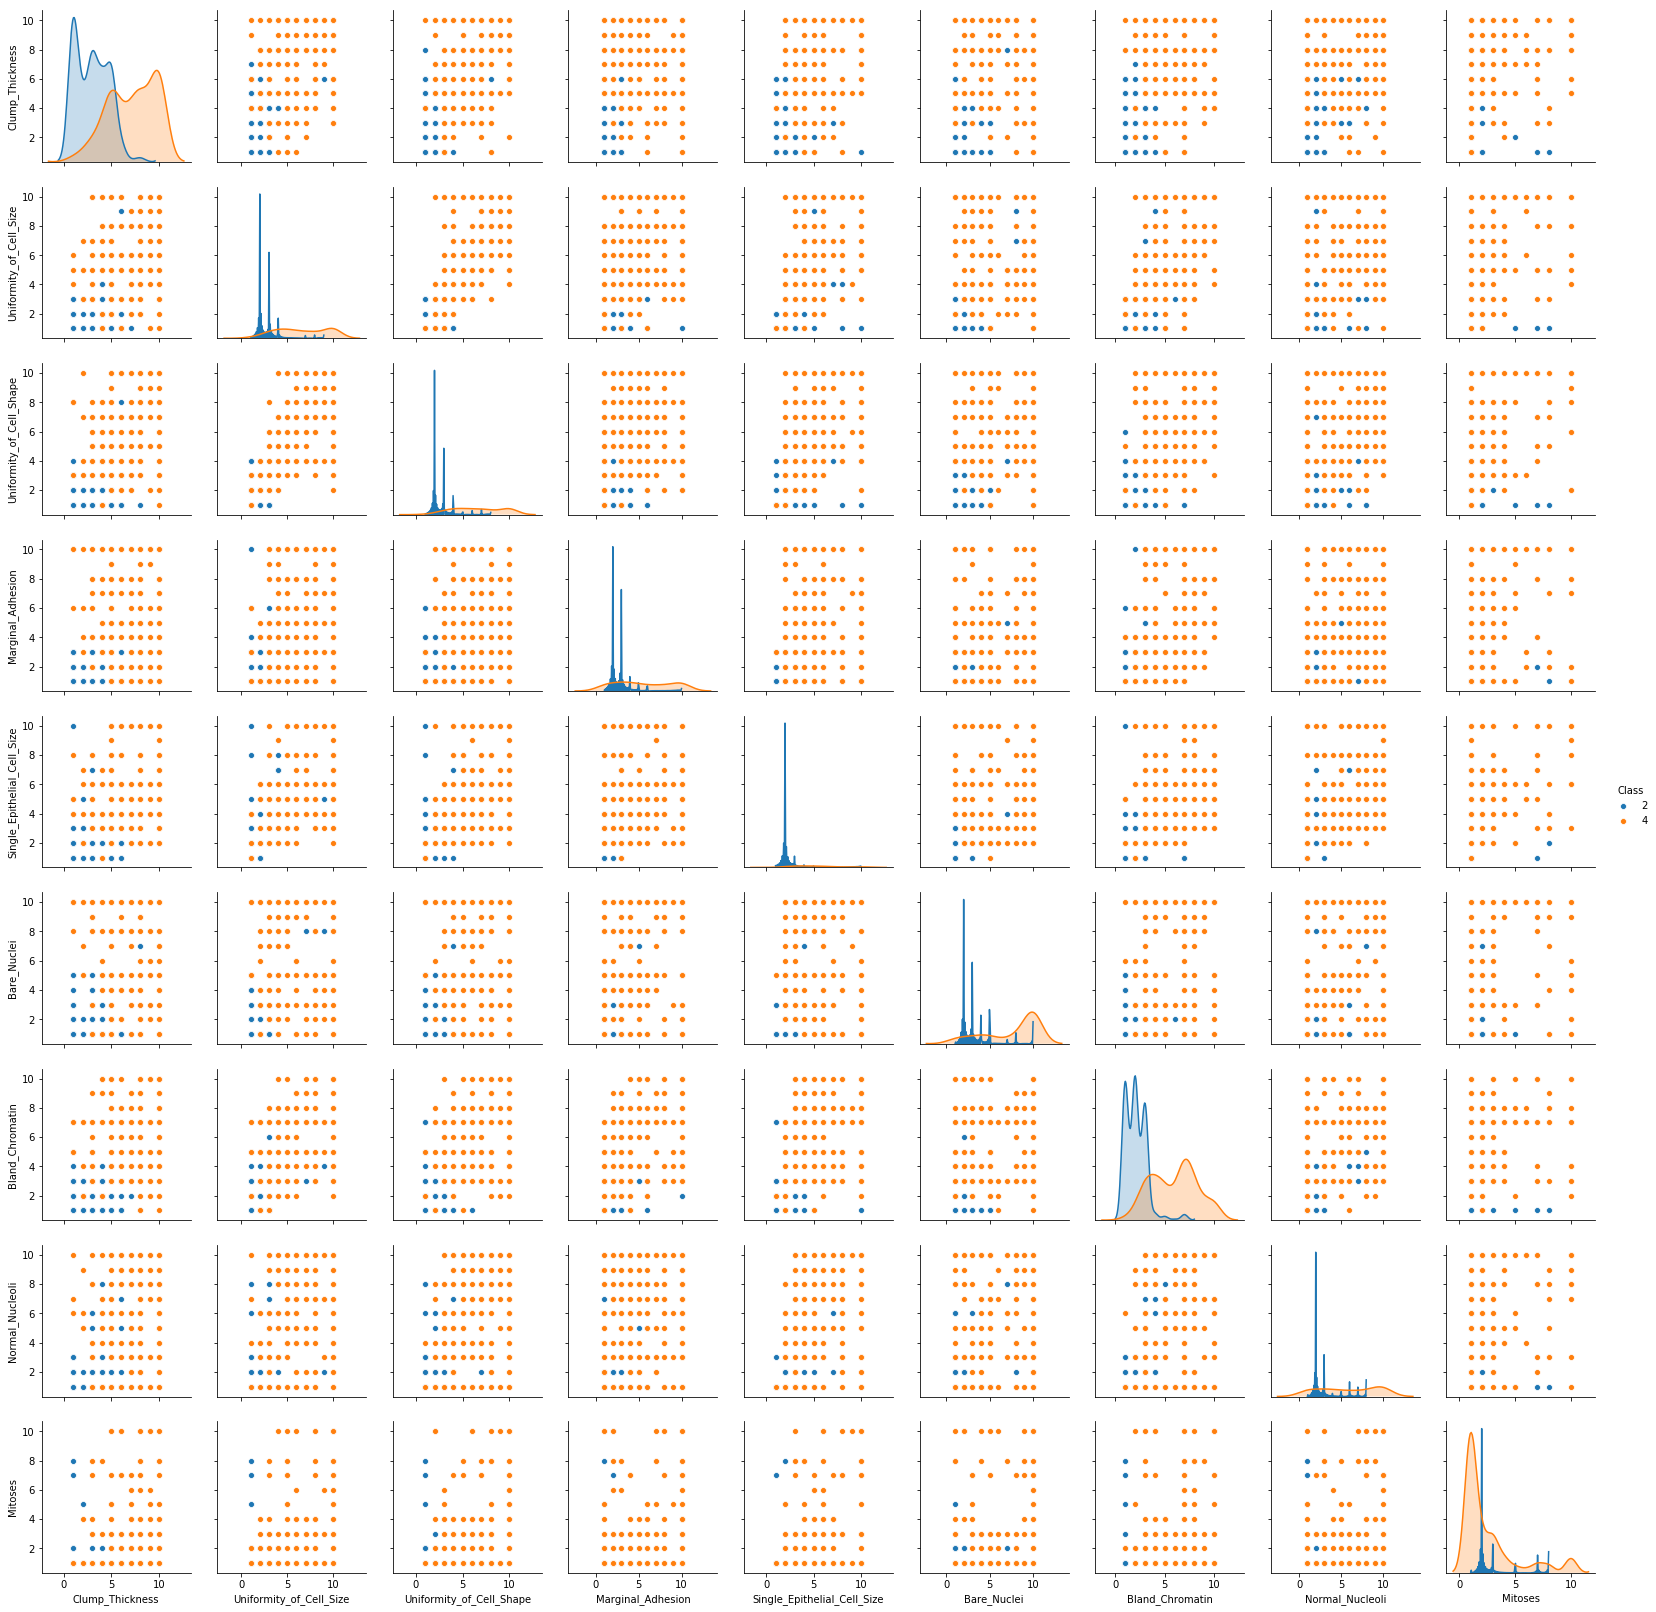

In [13]:
# Plotting correlation with labels

sns.pairplot(dataset,vars = ['Clump_Thickness','Uniformity_of_Cell_Size','Uniformity_of_Cell_Shape','Marginal_Adhesion','Single_Epithelial_Cell_Size','Bare_Nuclei','Bland_Chromatin','Normal_Nucleoli','Mitoses'],hue='Class')

## Distance implementation 

We are defining the distance we will use to find the neighbors, here the euclidian distance.

In [14]:
import math

In [15]:
def distance_euclidienne (x1,x2,l):
    dist = 0
    for i in range (l):
        dist += ((int(x1[i]) - int(x2[i]))**2)
    return math.sqrt(dist)

## Neighbors and result

The goal is to check the neighborhood of a point and to use it to to obtain the result.

In [16]:
import operator

In [17]:
# Obtain the k neighbors of a point X in the training set

def getNeighbors (training_set,X,k):
    distances=[]
    l = len(X)-1 
    for i in range (len(training_set)):
        dist = distance_euclidienne(X,training_set[i],l)
        distances.append((training_set[i],dist))
    distances.sort(key=operator.itemgetter(1))
    
    neighbors = []
    for i in range (k):
        neighbors.append(distances[i][0])
    return (neighbors)

In [18]:
# Now we have the k neighbors, we can get the result by taking the label that is in majority. In case of equality,
# we are taking the closest one.

def getResult (neighbors):
    class_neighbors={}
    for i in range (len(neighbors)):
        result=neighbors[i][-1]
        if result in class_neighbors:
            class_neihbors[result] += 1
        else:
            class_neighbors[result] = 1
        sorted_result = sorted(class_neighbors.items(), key=operator.itemgetter(0), reverse=True)
        return(sorted_result[0][0])
            

## Mise en place sur le dataset et evaluation de la methode

In [19]:
# In order to split the dataset randomly, we use the train_test_split from scikit learn

from sklearn.model_selection import train_test_split

In [20]:
# In order to compute the confusion matrix, we can use scikit learn too

from sklearn.metrics import confusion_matrix

In [34]:
# Now we have all necessary function, let's define a main that can be used for different dataset and k neighbors.

def main(k,dataset,acc):
    
    # Random split between train and test
    
    training_set,test_set = train_test_split(dataset,test_size=0.2,random_state=0) ## here we are working with a same split
    test_set = test_set.values.tolist()
    training_set = training_set.values.tolist()
    
    
    #create the prediction in order to compare it
    
    pred=[]
    res = []
    correct=0
    for i in range(len(test_set)):
        neighbors = getNeighbors(training_set,test_set[i],k)
        result = getResult(neighbors)
        pred.append(result)
        print('> predicted=' + repr(result) + ', actual=' + repr(test_set[i][-1]))
        res.append(test_set[i][-1])
        if res[i]==pred[i]:
            correct+=1
    accuracy = correct / (len(test_set))
    acc.append(accuracy)
    print("Number of neighbors:",k)
    print('Accuracy:',accuracy)
    print('Confuson Matrix:')
    print(confusion_matrix(res, pred))

In [35]:
# Result for k = 6 with each result, accuracy and confusion matrix
acc=[]
main(6,dataset,acc)

> predicted=2.0, actual=2.0
> predicted=2.0, actual=2.0
> predicted=4.0, actual=4.0
> predicted=4.0, actual=4.0
> predicted=2.0, actual=2.0
> predicted=2.0, actual=2.0
> predicted=2.0, actual=2.0
> predicted=4.0, actual=4.0
> predicted=2.0, actual=2.0
> predicted=2.0, actual=2.0
> predicted=4.0, actual=4.0
> predicted=2.0, actual=2.0
> predicted=4.0, actual=4.0
> predicted=2.0, actual=2.0
> predicted=2.0, actual=2.0
> predicted=4.0, actual=2.0
> predicted=4.0, actual=4.0
> predicted=4.0, actual=4.0
> predicted=4.0, actual=4.0
> predicted=2.0, actual=2.0
> predicted=2.0, actual=2.0
> predicted=2.0, actual=2.0
> predicted=4.0, actual=4.0
> predicted=2.0, actual=2.0
> predicted=4.0, actual=4.0
> predicted=4.0, actual=4.0
> predicted=2.0, actual=2.0
> predicted=2.0, actual=2.0
> predicted=2.0, actual=2.0
> predicted=4.0, actual=4.0
> predicted=2.0, actual=2.0
> predicted=4.0, actual=4.0
> predicted=4.0, actual=4.0
> predicted=2.0, actual=2.0
> predicted=2.0, actual=2.0
> predicted=2.0, act

# Haberman Survival Data


Relevant Information:
    
The dataset contains cases from a study that was conducted between
1958 and 1970 at the University of Chicago's Billings Hospital on
the survival of patients who had undergone surgery for breast cancer.


## Number of Instances: 
306

## Attribute Information:

   1. Age of patient at time of operation (numerical)
   2. Patient's year of operation (year - 1900, numerical)
   3. Number of positive axillary nodes detected (numerical)
   4. Survival status (class attribute)
   
         1 = the patient survived 5 years or longer
         
         2 = the patient died within 5 year

In [37]:
# Loading the dataset

dataset_bis = pd.read_csv('/home/jean/Downloads/haberman.data',header=None)
dataset_bis.head()

,0,1,2,3
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [38]:
# Renaming columns

dataset_bis.columns=['Age','Year_of_operation','Positive_axillary_nodes','Survival_status']

In [39]:
dataset_bis.head()

,Age,Year_of_operation,Positive_axillary_nodes,Survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [40]:
# Checking the number of unique value

dataset_bis.nunique()

Age                        49
Year_of_operation          12
Positive_axillary_nodes    31
Survival_status             2
dtype: int64

In [41]:
# Checking if there is not any undefined value

dataset_bis.isnull().sum()

Age                        0
Year_of_operation          0
Positive_axillary_nodes    0
Survival_status            0
dtype: int64

Survived:  444
Died :  239


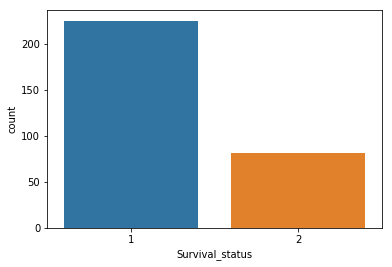

In [42]:
# Checking labels repartition

Y_bis = dataset_bis.Survival_status

X_bis = dataset_bis.drop(['Survival_status'],axis=1)

S,D=Y_bis.value_counts()
ax = sns.countplot(Y_bis,label="Count")   
print('Survived: ',B)
print('Died : ',M)

In [43]:
# Check in depth description of columns

dataset_bis.describe()

,Age,Year_of_operation,Positive_axillary_nodes,Survival_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


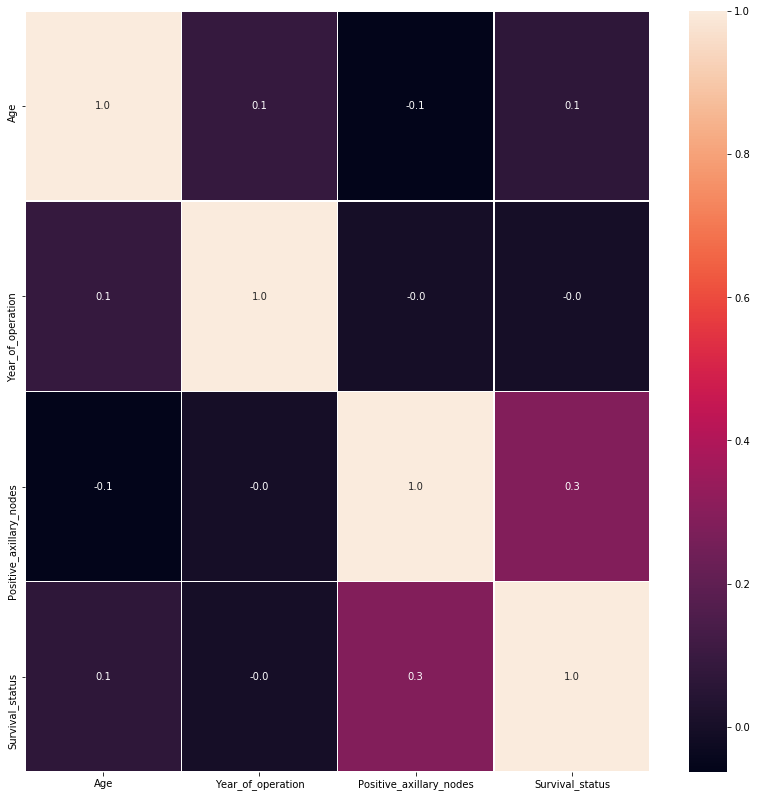

In [44]:
# Plotting the heatmap to see correlation intensity between variables

f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(dataset_bis.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

#### Here we can see that we do not have any real correlation between the different variables and the one we want to determine, let's go more in depth by using labels

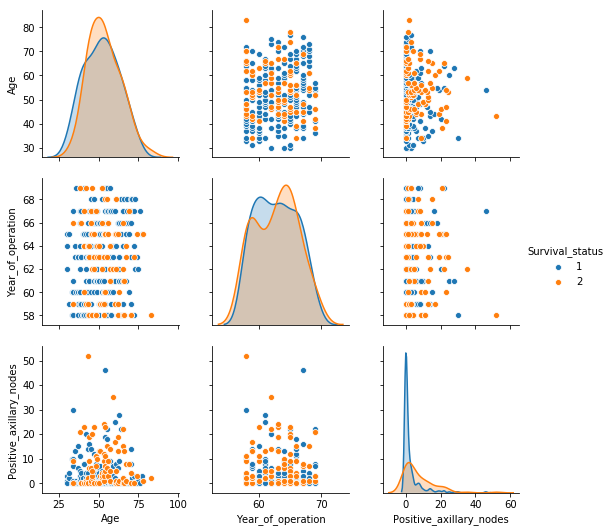

In [45]:
# Plotting correlation with labels


sns.pairplot(dataset_bis,vars = ['Age','Year_of_operation','Positive_axillary_nodes'],hue='Survival_status')

In [46]:
# Result for k = 6 with each result, accuracy and confusion matrix
acc=[]
main(6,dataset_bis,acc)

> predicted=1, actual=2
> predicted=1, actual=1
> predicted=1, actual=2
> predicted=1, actual=1
> predicted=2, actual=2
> predicted=1, actual=1
> predicted=1, actual=2
> predicted=2, actual=2
> predicted=1, actual=2
> predicted=1, actual=1
> predicted=1, actual=1
> predicted=1, actual=1
> predicted=2, actual=2
> predicted=1, actual=1
> predicted=1, actual=2
> predicted=1, actual=1
> predicted=2, actual=1
> predicted=1, actual=2
> predicted=1, actual=1
> predicted=1, actual=1
> predicted=1, actual=1
> predicted=1, actual=2
> predicted=1, actual=1
> predicted=1, actual=1
> predicted=2, actual=1
> predicted=1, actual=2
> predicted=1, actual=1
> predicted=1, actual=1
> predicted=1, actual=2
> predicted=1, actual=1
> predicted=1, actual=1
> predicted=1, actual=1
> predicted=1, actual=2
> predicted=1, actual=2
> predicted=2, actual=2
> predicted=1, actual=2
> predicted=1, actual=2
> predicted=1, actual=1
> predicted=2, actual=2
> predicted=1, actual=1
> predicted=2, actual=2
> predicted=1, a

# Conclusion

As we can see, the accuracy is pretty good for the first dataset (better that 96% accuracy and convincing results for the confusint matrix), however we can't get such results on the second dataset. Barely the same than random guess because there are actually 65% of survivors anyway (444/(444+239))=0.65.

This is probably due to the fact that for the second set of data, the variables are very uncorrelated with the one we want to determine, unlike the first set.

Consequently, it is more difficult to rely on the relationship between these data (distances) in order to conclude on the survival rate.

# Possible improvements:

#### -1/ In order to have more robustness for accuracy and confusion matrix, it would be good to run the program several times for a given k and average the results obtained.

#### -2/ Normalizing the data before calculating distances could improve accuracy to avoid the prevalence of some (even if it is already a little bit the case for the first dataset because all columns are 1-10).

#### -3/ It might be interesting to check the results obtained with the use of distances other than the Euclidean.